In [1]:
#Import libraries and training file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

asbank = pd.read_csv('D:/Kartik/VESIM Docs/MBA Competitions/Brain-A-lytics/train.csv')
asbank.head(10)

,S_No,Cust_id,Gender,Cust_dob,Lead_Created_On,Loc_id,Id_City,Employer_Id,Employer_Ct1,Employer_Ct2,...,Type_Bank,IsContacted,Lead_Origin,Origin_Category,Prev_EMI,Req_Amount,Tenure,Rate,Curr_EMI,Is_sanctioned
0,1,60857695054,Male,1963-07-21,2012-10-07,10003.0,A,COM0001784,C,4.0,...,P,Y,S133,C,0.0,69000.0,5.0,14.85,1636.0,0
1,4,10697718992,Male,1977-01-21,2014-10-12,10005.0,A,COM0039123,A,4.0,...,G,Y,S133,C,0.0,180000.0,5.0,14.85,4268.0,0
2,5,50442961299,Male,1963-06-19,2010-05-09,10001.0,A,COM0000163,C,4.0,...,P,Y,S133,C,0.0,61000.0,4.0,14.85,1693.0,0
3,6,80323301467,Male,1989-11-20,2017-09-23,10097.0,C,COM0001081,C,4.0,...,G,Y,S133,B,0.0,60000.0,5.0,13.99,1396.0,0
4,7,40696380856,Female,1968-07-18,2017-04-10,10001.0,A,COM0003228,A,4.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
5,8,30574152485,Male,1957-10-16,2016-08-06,10002.0,A,COM0000013,A,1.0,...,P,Y,S122,F,0.0,56000.0,5.0,NaN,NaN,0
6,9,90963210725,Female,1973-05-12,2013-09-18,10007.0,A,COM0000140,B,4.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
7,10,60863398331,Male,1967-01-15,2010-07-14,10003.0,A,COM0000090,C,3.0,...,P,Y,S133,B,446.5,5000.0,5.0,14.85,119.0,0
8,11,40075522925,Male,1965-05-23,2019-02-27,10007.0,A,COM0003379,A,4.0,...,P,Y,S133,C,0.0,44000.0,5.0,NaN,NaN,0
9,12,20614523445,Male,1986-02-25,2018-12-04,10003.0,A,COM0011908,A,4.0,...,P,Y,S122,B,0.0,5000.0,3.0,31.00,215.0,0


In [2]:
#Name of all the columns

asbank.columns

Index(['S_No', 'Cust_id ', 'Gender', 'Cust_dob ', 'Lead_Created_On ',
       'Loc_id ', 'Id_City', 'Employer_Id', 'Employer_Ct1 ', 'Employer_Ct2',
       'Income ', 'CustBankCode ', 'Type_Bank', 'IsContacted', 'Lead_Origin ',
       'Origin_Category', 'Prev_EMI ', 'Req_Amount', 'Tenure', 'Rate',
       'Curr_EMI', 'Is_sanctioned'],
      dtype='object')

In [3]:
asbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55058 entries, 0 to 55057
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S_No              55058 non-null  int64  
 1   Cust_id           55058 non-null  int64  
 2   Gender            55058 non-null  object 
 3   Cust_dob          55058 non-null  object 
 4   Lead_Created_On   55058 non-null  object 
 5   Loc_id            54410 non-null  float64
 6   Id_City           54410 non-null  object 
 7   Employer_Id       51872 non-null  object 
 8   Employer_Ct1      51872 non-null  object 
 9   Employer_Ct2      51644 non-null  float64
 10  Income            55058 non-null  float64
 11  CustBankCode      47627 non-null  object 
 12  Type_Bank         47627 non-null  object 
 13  IsContacted       55058 non-null  object 
 14  Lead_Origin       55058 non-null  object 
 15  Origin_Category   55058 non-null  object 
 16  Prev_EMI          55026 non-null  float6

In [4]:
asbank.isnull().sum()

S_No                    0
Cust_id                 0
Gender                  0
Cust_dob                0
Lead_Created_On         0
Loc_id                648
Id_City               648
Employer_Id          3186
Employer_Ct1         3186
Employer_Ct2         3414
Income                  0
CustBankCode         7431
Type_Bank            7431
IsContacted             0
Lead_Origin             0
Origin_Category         0
Prev_EMI               32
Req_Amount          21923
Tenure              21923
Rate                37479
Curr_EMI            37479
Is_sanctioned           0
dtype: int64

In [5]:
#All descriptive statistics

asbank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S_No,55058,NaN,NaN,NaN,34431.4,19882.1,1,17193.2,34484.5,51674.8,68823
Cust_id,55058,NaN,NaN,NaN,5.05567e+10,2.58114e+10,1.00001e+10,3.02699e+10,5.05033e+10,7.07454e+10,9.1e+10
Gender,55058,2,Male,31564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cust_dob,55058,13500,1974-09-05,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead_Created_On,55058,3360,2016-05-27,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loc_id,54410,NaN,NaN,NaN,10028.2,73.8692,10001,10002,10005,10014,10722
Id_City,54410,3,A,39399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employer_Id,51872,30340,COM0000002,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employer_Ct1,51872,3,A,26282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employer_Ct2,51644,NaN,NaN,NaN,3.71964,0.807446,1,4,4,4,4


# Exploratory analysis and Data cleaning

,Is_sanctioned,Cust_id
0,0,54250
1,1,808


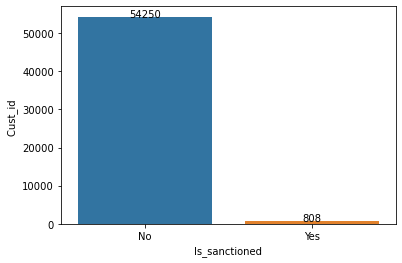

In [6]:
#Number of sanctioned and not-sanctioned loans in the data set

Sanctioning = asbank.groupby(['Is_sanctioned'])['Cust_id '].count().reset_index()
display(Sanctioning)
sns.barplot(Sanctioning['Is_sanctioned'], Sanctioning['Cust_id '])

#To plot values on bars

for i in Sanctioning['Is_sanctioned']:
    plt.text(i, Sanctioning['Cust_id '][i],Sanctioning['Cust_id '][i], ha='center')
    
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [7]:
#Creating a function to calculate age from date of birth and similarly the customer's connection with the bank

from datetime import date
  
def calculate_age(birthdate): 
    today = date.today()
    Age = today.year - birthdate.year - ((today.month, today.day) <  (birthdate.month, birthdate.day))
    return Age



In [8]:
#Converting string format to datetime format

asbank['Cust_dob '] = pd.to_datetime(asbank['Cust_dob '])
asbank['Lead_Created_On '] = pd.to_datetime(asbank['Lead_Created_On '])

In [9]:
#applying the age calculating function

asbank['Cust_age'] = asbank['Cust_dob '].apply(calculate_age)
asbank['Lead_age'] = asbank['Lead_Created_On '].apply(calculate_age)

In [10]:
#Converting it into Data Frame

Cust_age = pd.DataFrame(asbank['Cust_age'])
Lead_age = pd.DataFrame(asbank['Lead_age'])

In [11]:
#Dropping the dates column

asbank = asbank.drop(['Cust_dob ', 'Lead_Created_On '],axis=1)

In [12]:
asbank

,S_No,Cust_id,Gender,Loc_id,Id_City,Employer_Id,Employer_Ct1,Employer_Ct2,Income,CustBankCode,...,Lead_Origin,Origin_Category,Prev_EMI,Req_Amount,Tenure,Rate,Curr_EMI,Is_sanctioned,Cust_age,Lead_age
0,1,60857695054,Male,10003.0,A,COM0001784,C,4.0,4200.0,B004,...,S133,C,0.0,69000.0,5.0,14.85,1636.0,0,57,8
1,4,10697718992,Male,10005.0,A,COM0039123,A,4.0,12000.0,B009,...,S133,C,0.0,180000.0,5.0,14.85,4268.0,0,44,6
2,5,50442961299,Male,10001.0,A,COM0000163,C,4.0,4000.0,B002,...,S133,C,0.0,61000.0,4.0,14.85,1693.0,0,57,10
3,6,80323301467,Male,10097.0,C,COM0001081,C,4.0,3000.0,B003,...,S133,B,0.0,60000.0,5.0,13.99,1396.0,0,31,3
4,7,40696380856,Female,10001.0,A,COM0003228,A,4.0,4000.0,B002,...,S133,B,0.0,NaN,NaN,NaN,NaN,0,52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55053,68818,30111876552,Male,10002.0,A,COM0015835,A,4.0,6850.0,B001,...,S122,G,0.0,50000.0,3.0,NaN,NaN,0,36,6
55054,68819,40850741762,Male,10001.0,A,COM0035766,B,4.0,3400.0,B004,...,S122,G,761.8,20000.0,4.0,18.15,589.0,0,41,4
55055,68821,80242582246,Male,10005.0,A,COM0000533,C,4.0,4500.0,B002,...,S122,G,0.0,81000.0,4.0,13.75,2203.0,0,49,3
55056,68822,40499902358,Female,10037.0,B,COM0012968,A,4.0,500.0,B008,...,S122,G,200.0,NaN,NaN,NaN,NaN,0,66,3


In [13]:
asbank.columns

Index(['S_No', 'Cust_id ', 'Gender', 'Loc_id ', 'Id_City', 'Employer_Id',
       'Employer_Ct1 ', 'Employer_Ct2', 'Income ', 'CustBankCode ',
       'Type_Bank', 'IsContacted', 'Lead_Origin ', 'Origin_Category',
       'Prev_EMI ', 'Req_Amount', 'Tenure', 'Rate', 'Curr_EMI',
       'Is_sanctioned', 'Cust_age', 'Lead_age'],
      dtype='object')

In [14]:
#Dropping non relevant columns

asbank = asbank.drop(['S_No', 'Cust_id ','Employer_Id','Employer_Ct1 ', 'Employer_Ct2'],axis=1)

In [15]:
#correlation between variables

correlation = asbank.corr()
fig = plt.figure(figsize=(12,10))
correlation

,Loc_id,Income,Prev_EMI,Req_Amount,Tenure,Rate,Curr_EMI,Is_sanctioned,Cust_age,Lead_age
Loc_id,1.000000,-0.000111,0.003658,-0.062287,0.010671,0.002602,-0.086694,-0.024453,-0.001082,-0.006011
Income,-0.000111,1.000000,0.255108,0.044589,-0.000355,-0.015062,0.037701,0.000260,0.002999,0.004278
Prev_EMI,0.003658,0.255108,1.000000,0.008732,-0.003183,-0.021032,-0.000355,0.025145,0.007500,-0.000779
Req_Amount,-0.062287,0.044589,0.008732,1.000000,0.377196,-0.319150,0.917753,0.049861,0.004073,-0.001091
Tenure,0.010671,-0.000355,-0.003183,0.377196,1.000000,-0.094991,0.077409,0.005845,0.001051,0.003785
Rate,0.002602,-0.015062,-0.021032,-0.319150,-0.094991,1.000000,-0.240004,-0.095869,-0.001061,0.003027
Curr_EMI,-0.086694,0.037701,-0.000355,0.917753,0.077409,-0.240004,1.000000,0.057098,0.012368,-0.010884
Is_sanctioned,-0.024453,0.000260,0.025145,0.049861,0.005845,-0.095869,0.057098,1.000000,0.000407,0.001736
Cust_age,-0.001082,0.002999,0.007500,0.004073,0.001051,-0.001061,0.012368,0.000407,1.000000,-0.002525
Lead_age,-0.006011,0.004278,-0.000779,-0.001091,0.003785,0.003027,-0.010884,0.001736,-0.002525,1.000000


<Figure size 864x720 with 0 Axes>

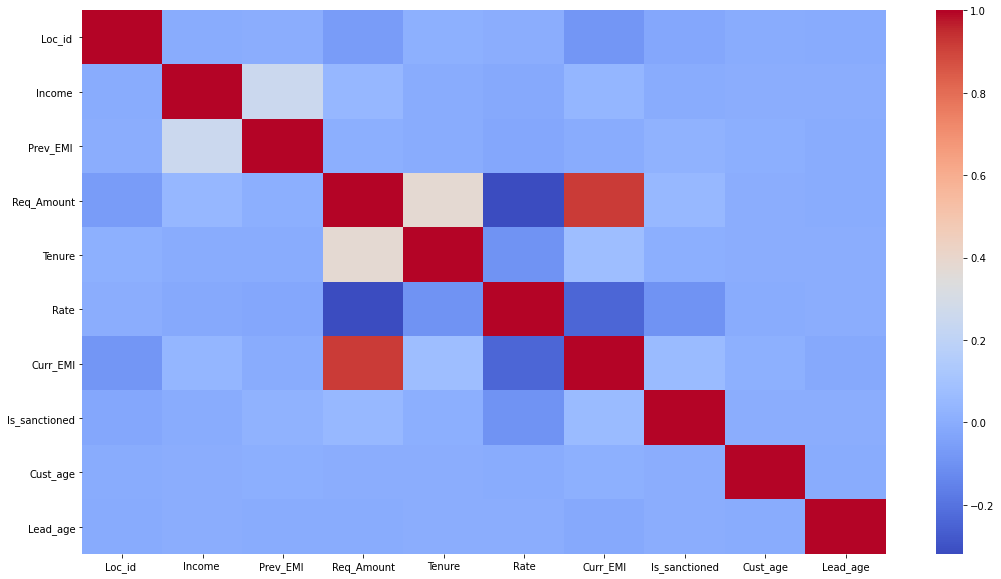

In [16]:
#correlation between variables in the form of heatmap

correlation = asbank.corr()
fig = plt.figure(figsize=(18,10))
sns.heatmap(correlation,cmap='coolwarm')

In [17]:
#filling in the null values of city with mode 

x = asbank['Id_City'].mode()
asbank['Id_City'].fillna(x[0],inplace=True)

In [18]:
#Customers from City A have been sanctioned a lot

asbank[['Id_City','Is_sanctioned']].groupby(['Id_City']).sum()

,Is_sanctioned
Id_City,
A,657
B,82
C,69


In [19]:
#just an observation

asbank[['Gender','Is_sanctioned']].groupby(['Gender']).sum()

,Is_sanctioned
Gender,
Female,202
Male,606


In [20]:
#Private bank sanctions more loans as compared to Govt banks

asbank[['Type_Bank','Is_sanctioned']].groupby(['Type_Bank']).sum()

,Is_sanctioned
Type_Bank,
G,159
P,630


In [21]:
#Higher Income people having mean age of 50 years live in City A 

asbank[['Id_City','Income ','Cust_age']].groupby(['Id_City']).mean()

,Income,Cust_age
Id_City,,
A,6535.152473,50.079831
B,3416.085342,49.741852
C,4201.238168,50.031264


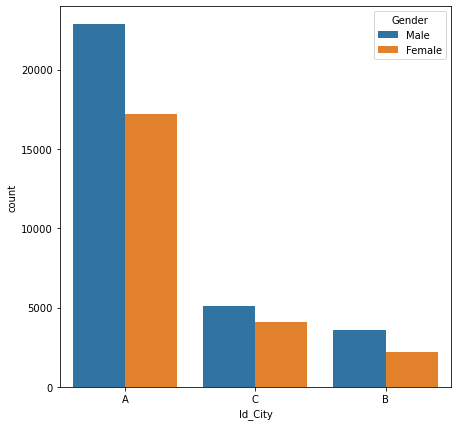

In [22]:
#More males in every city

fig = plt.figure(figsize=(7,7))
sns.countplot(x='Id_City',hue = 'Gender',data=asbank)

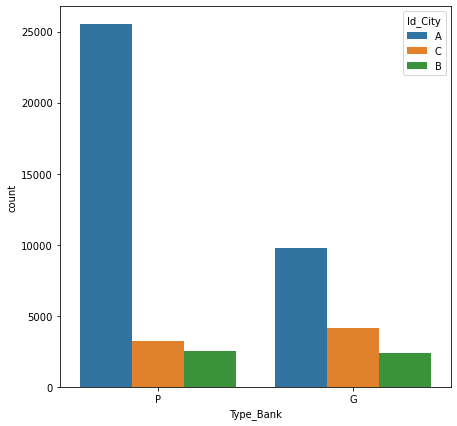

In [23]:
#City A is highly prefered by Private Banks

fig = plt.figure(figsize=(7,7))
sns.countplot(x='Type_Bank',hue='Id_City',data=asbank)


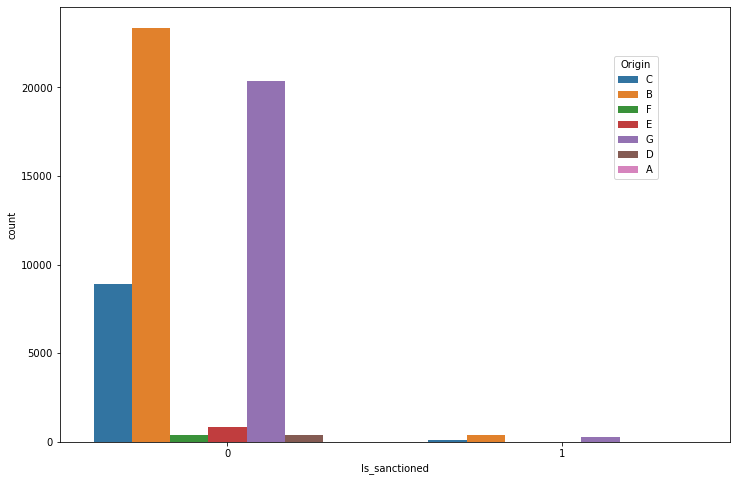

In [24]:
#Applicants through different category of origins (C,B,G the highest)

fig = plt.figure(figsize=(12,8))
sns.countplot(x='Is_sanctioned',hue='Origin_Category',data=asbank)
plt.legend(title='Origin',bbox_to_anchor=[0.9,0.9])

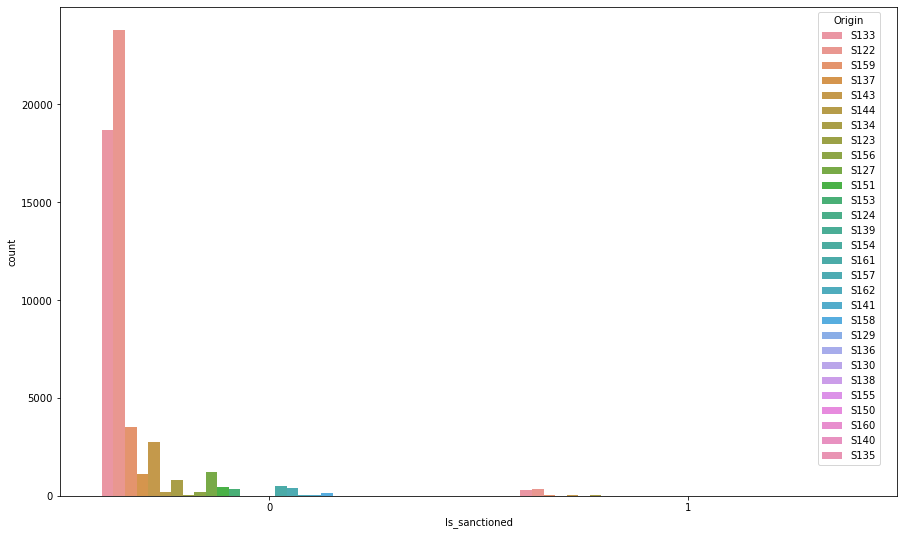

In [25]:
##Applicants through different lead origins

fig = plt.figure(figsize=(15,9))
sns.countplot(x='Is_sanctioned',hue='Lead_Origin ',data=asbank)
plt.legend(title='Origin',bbox_to_anchor=[0.9,1])

In [26]:
asbank.isna().sum()

Gender                 0
Loc_id               648
Id_City                0
Income                 0
CustBankCode        7431
Type_Bank           7431
IsContacted            0
Lead_Origin            0
Origin_Category        0
Prev_EMI              32
Req_Amount         21923
Tenure             21923
Rate               37479
Curr_EMI           37479
Is_sanctioned          0
Cust_age               0
Lead_age               0
dtype: int64

In [27]:
asbank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,55058,2,Male,31564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loc_id,54410,NaN,NaN,NaN,10028.2,73.8692,10001,10002,10005,10014,10722
Id_City,55058,3,A,40047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,55058,NaN,NaN,NaN,5816.14,191631,0,1650,2500,4000,3.83838e+07
CustBankCode,47627,58,B001,11106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_Bank,47627,2,P,31265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsContacted,55058,2,Y,35741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead_Origin,55058,29,S122,24146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin_Category,55058,7,B,23751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prev_EMI,55026,NaN,NaN,NaN,363.155,2532.7,0,0,0,350,545436


In [28]:
#Maximum and minimum age of customers

print(asbank['Cust_age'].max())
print(asbank['Cust_age'].min())

71
30


In [29]:
#Grouping people intp age groups

bins = [30,40,50,60,70,80]
labels = ['Young_adults','Adult','Middle_Age','Retired','Senior_Citizen']

asbank['Age_group'] = pd.cut(asbank['Cust_age'],bins = bins, labels = labels)
pd.DataFrame(asbank['Age_group'].value_counts())

,Age_group
Middle_Age,13527
Adult,13486
Young_adults,13454
Retired,13294
Senior_Citizen,82


In [30]:
#filling the null values of Age_group with 'Middle_Age' value

asbank['Age_group'] = asbank['Age_group'].fillna('Middle_Age')

In [31]:
asbank[['Age_group','Income ']].groupby(['Age_group']).mean()

,Income
Age_group,
Young_adults,4262.218508
Adult,4882.596226
Middle_Age,5481.270974
Retired,8722.032932
Senior_Citizen,3399.426829


In [32]:
#Middle Age people are sanctioned a lot more compared to other groups

asbank[['Age_group','Is_sanctioned']].groupby(['Age_group']).sum()

,Is_sanctioned
Age_group,
Young_adults,203
Adult,187
Middle_Age,218
Retired,197
Senior_Citizen,3


<function matplotlib.pyplot.subplot(*args, **kwargs)>

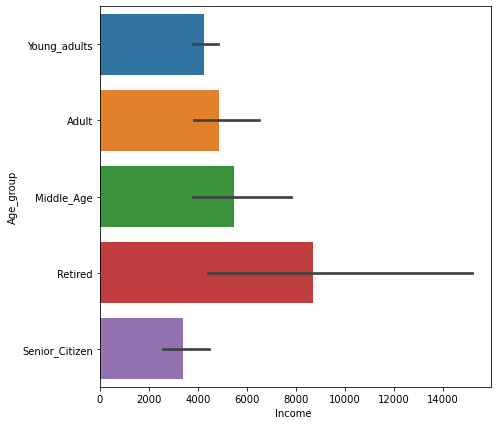

In [33]:
#visualizing Income vs Age group

fig = plt.figure(figsize=(7,7))
sns.barplot(x='Income ',y='Age_group',data=asbank)
plt.subplot

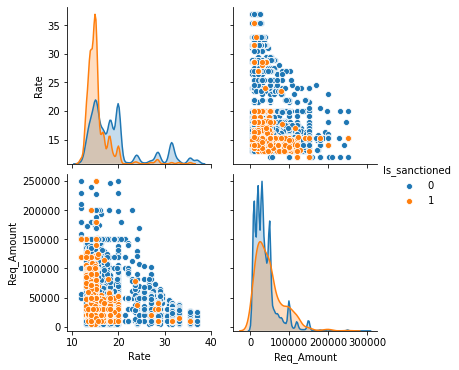

In [34]:
#cheking relation between parameters

df = asbank[['Rate','Req_Amount','Is_sanctioned']]
sns.pairplot(df,hue='Is_sanctioned')

In [35]:
#mean req amount as per age group

asbank[['Age_group','Req_Amount']].groupby(['Age_group']).mean()

,Req_Amount
Age_group,
Young_adults,39074.886628
Adult,39676.314817
Middle_Age,39559.273965
Retired,39546.978606
Senior_Citizen,41102.040816


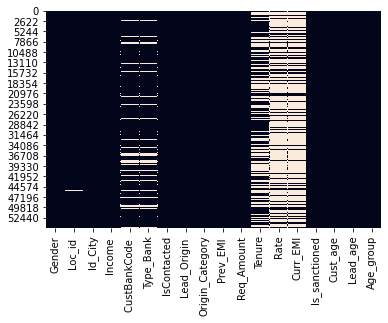

In [36]:
#adding missing values to req_amount with the mean values of respective age groups

def impute_missing_req_amt(columns):
    req_amt=columns[0]
    age_group = columns[1]
    if pd.isnull(req_amt):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['Req_Amount'].mean()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['Req_Amount'].mean()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['Req_Amount'].mean()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['Req_Amount'].mean()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['Req_Amount'].mean()
        
    else:
        return req_amt

asbank['Req_Amount'] = asbank[['Req_Amount','Age_group']].apply(impute_missing_req_amt,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

In [37]:
asbank[['Age_group','Req_Amount']].groupby(['Age_group']).mean()

,Req_Amount
Age_group,
Young_adults,39074.886628
Adult,39676.314817
Middle_Age,39559.273965
Retired,39546.978606
Senior_Citizen,41102.040816


In [38]:
#In all Age groups, Type of Bank preferrred most is P(Private)

asbank.groupby(['Age_group', 'Type_Bank'])['Type_Bank'].count()

Age_group       Type_Bank
Young_adults    G            4038
                P            7628
Adult           G            3940
                P            7734
Middle_Age      G            4413
                P            8329
Retired         G            3944
                P            7524
Senior_Citizen  G              27
                P              50
Name: Type_Bank, dtype: int64

In [39]:
#filling null values of Type_Bank with P

asbank['Type_Bank'] = asbank['Type_Bank'].fillna('P')

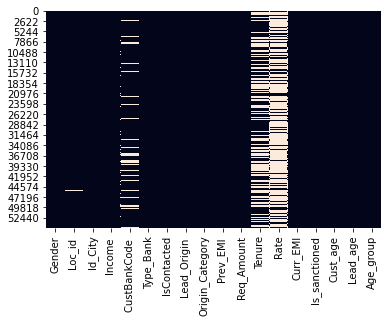

In [40]:
#adding missing values to Curr_EMI using mean of Curr_EMI of age group

def impute_missing_Curr_EMI(columns):
    Curr_EMI=columns[0]
    age_group = columns[1]
    if pd.isnull(Curr_EMI):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['Curr_EMI'].mean()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['Curr_EMI'].mean()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['Curr_EMI'].mean()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['Curr_EMI'].mean()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['Curr_EMI'].mean()
        
    else:
        return Curr_EMI

asbank['Curr_EMI'] = asbank[['Curr_EMI','Age_group']].apply(impute_missing_Curr_EMI,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

In [41]:
print(asbank[asbank['Age_group']=='Young_adults']['Tenure'].mode())
print(asbank[asbank['Age_group']=='Adult']['Tenure'].mode())
print(asbank[asbank['Age_group']=='Senior_Citizen']['Tenure'].mode())
print(asbank[asbank['Age_group']=='Middle_Age']['Tenure'].mode())
print(asbank[asbank['Age_group']=='Retired']['Tenure'].mode())

0    5.0
dtype: float64
0    5.0
dtype: float64
0    4.0
1    5.0
dtype: float64
0    5.0
dtype: float64
0    5.0
dtype: float64


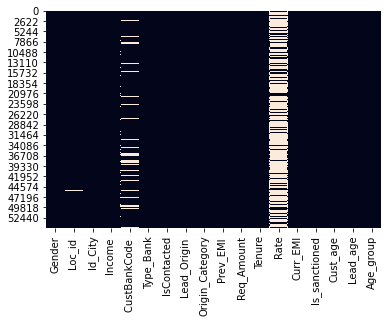

In [42]:
#adding missing values to Tenure using mode of Tenure of age group

asbank['Tenure'] = asbank['Tenure'].fillna(5)
sns.heatmap(asbank.isnull(),cbar=False)

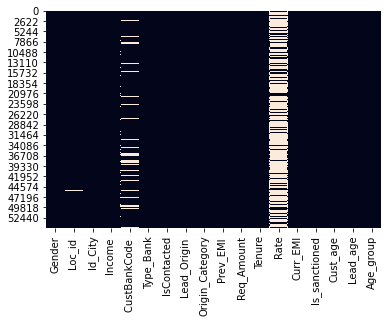

In [43]:
#adding missing values to Prev_EMI using mean of Prev_EMI of age group

def impute_missing_Prev_EMI(columns):
    Prev_EMI=columns[0]
    age_group = columns[1]
    if pd.isnull(Prev_EMI):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['Prev_EMI '].mean()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['Prev_EMI '].mean()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['Prev_EMI '].mean()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['Prev_EMI '].mean()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['Prev_EMI '].mean()
        
    else:
        return Prev_EMI

asbank['Prev_EMI '] = asbank[['Prev_EMI ','Age_group']].apply(impute_missing_Prev_EMI,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

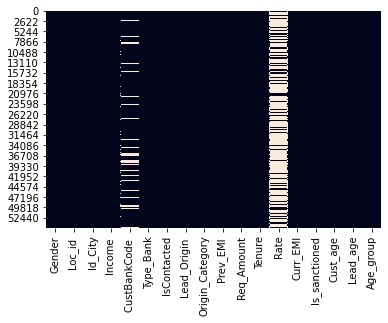

In [44]:
#adding missing values to Loc_id 

def impute_missing_Loc_id(columns):
    Loc_id=columns[0]
    age_group = columns[1]
    if pd.isnull(Loc_id):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['Loc_id '].mode()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['Loc_id '].mode()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['Loc_id '].mode()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['Loc_id '].mode()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['Loc_id '].mode()
        
    else:
        return Loc_id

asbank['Loc_id '] = asbank[['Loc_id ','Age_group']].apply(impute_missing_Loc_id,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

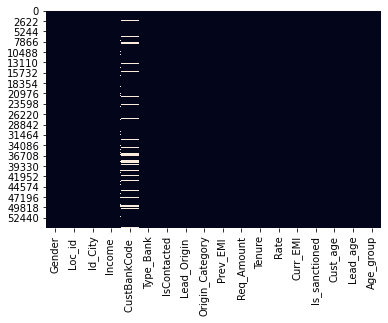

In [45]:
#adding missing values to Rate using mean of Rate of age group

def impute_missing_Rate(columns):
    Rate=columns[0]
    age_group = columns[1]
    if pd.isnull(Rate):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['Rate'].mean()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['Rate'].mean()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['Rate'].mean()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['Rate'].mean()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['Rate'].mean()
        
    else:
        return Rate

asbank['Rate'] = asbank[['Prev_EMI ','Age_group']].apply(impute_missing_Rate,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

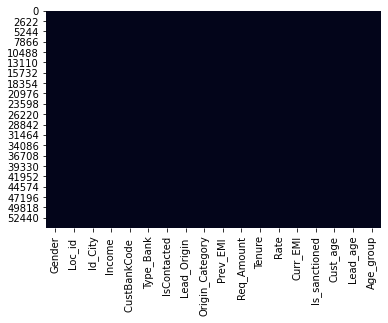

In [46]:
#adding missing values to CustBankCode using mode of CustBankCode of age group

def impute_missing_CustBankCode(columns):
    CustBankCode=columns[0]
    age_group = columns[1]
    if pd.isnull(CustBankCode):
        if(age_group=='Young_adults'):
            return asbank[asbank['Age_group']=='Young_adults']['CustBankCode '].mode()
        elif(age_group=='Adult'):
            return asbank[asbank['Age_group']=='Adult']['CustBankCode '].mode()
        elif(age_group=='Middle_Age'):
            return asbank[asbank['Age_group']=='Middle_Age']['CustBankCode '].mode()
        elif(age_group=='Retired'):
            return asbank[asbank['Age_group']=='Retired']['CustBankCode '].mode()
        elif(age_group=='Senior_Citizen'):
            return asbank[asbank['Age_group']=='Senior_Citizen']['CustBankCode '].mode()
        
    else:
        return CustBankCode

asbank['CustBankCode '] = asbank[['CustBankCode ','Age_group']].apply(impute_missing_CustBankCode,axis=1)
sns.heatmap(asbank.isnull(),cbar=False)

In [47]:
#Cnverting categorical data to binary data

features = [ 'Gender', 'Id_City',  'Type_Bank', 'IsContacted',  'Origin_Category']

asbank1 = asbank

In [48]:
asbank1 = pd.get_dummies(asbank,columns=features)

In [49]:
asbank1.isnull().sum()

Loc_id               0
Income               0
CustBankCode         0
Lead_Origin          0
Prev_EMI             0
Req_Amount           0
Tenure               0
Rate                 0
Curr_EMI             0
Is_sanctioned        0
Cust_age             0
Lead_age             0
Age_group            0
Gender_Female        0
Gender_Male          0
Id_City_A            0
Id_City_B            0
Id_City_C            0
Type_Bank_G          0
Type_Bank_P          0
IsContacted_N        0
IsContacted_Y        0
Origin_Category_A    0
Origin_Category_B    0
Origin_Category_C    0
Origin_Category_D    0
Origin_Category_E    0
Origin_Category_F    0
Origin_Category_G    0
dtype: int64

In [50]:
asbank1

,Loc_id,Income,CustBankCode,Lead_Origin,Prev_EMI,Req_Amount,Tenure,Rate,Curr_EMI,Is_sanctioned,...,Type_Bank_P,IsContacted_N,IsContacted_Y,Origin_Category_A,Origin_Category_B,Origin_Category_C,Origin_Category_D,Origin_Category_E,Origin_Category_F,Origin_Category_G
0,10003,4200.0,B004,S133,0.0,69000.000000,5.0,0.0,1636.000000,0,...,1,0,1,0,0,1,0,0,0,0
1,10005,12000.0,B009,S133,0.0,180000.000000,5.0,0.0,4268.000000,0,...,0,0,1,0,0,1,0,0,0,0
2,10001,4000.0,B002,S133,0.0,61000.000000,4.0,0.0,1693.000000,0,...,1,0,1,0,0,1,0,0,0,0
3,10097,3000.0,B003,S133,0.0,60000.000000,5.0,0.0,1396.000000,0,...,0,0,1,0,1,0,0,0,0,0
4,10001,4000.0,B002,S133,0.0,39559.273965,5.0,0.0,1123.103032,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55053,10002,6850.0,B001,S122,0.0,50000.000000,3.0,0.0,1078.858853,0,...,1,0,1,0,0,0,0,0,0,1
55054,10001,3400.0,B004,S122,761.8,20000.000000,4.0,761.8,589.000000,0,...,1,0,1,0,0,0,0,0,0,1
55055,10005,4500.0,B002,S122,0.0,81000.000000,4.0,0.0,2203.000000,0,...,1,0,1,0,0,0,0,0,0,1
55056,10037,500.0,B008,S122,200.0,39546.978606,5.0,200.0,1100.410978,0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
asbank1.columns

Index(['Loc_id ', 'Income ', 'CustBankCode ', 'Lead_Origin ', 'Prev_EMI ',
       'Req_Amount', 'Tenure', 'Rate', 'Curr_EMI', 'Is_sanctioned', 'Cust_age',
       'Lead_age', 'Age_group', 'Gender_Female', 'Gender_Male', 'Id_City_A',
       'Id_City_B', 'Id_City_C', 'Type_Bank_G', 'Type_Bank_P', 'IsContacted_N',
       'IsContacted_Y', 'Origin_Category_A', 'Origin_Category_B',
       'Origin_Category_C', 'Origin_Category_D', 'Origin_Category_E',
       'Origin_Category_F', 'Origin_Category_G'],
      dtype='object')

# Parameter Selection using Forward Selection method (Wrapper technique)

In [52]:
#Defining predictant and predictors

X = asbank1[['Income ',  'Prev_EMI ', 'Req_Amount', 'Tenure', 'Rate', 'Curr_EMI', 'Cust_age', 'Lead_age', 
             'Gender_Female', 'Gender_Male', 'Id_City_A', 'Id_City_B','Loc_id ',
       'Id_City_C', 'Type_Bank_G', 'Type_Bank_P', 'IsContacted_N',
       'IsContacted_Y', 'Origin_Category_A', 'Origin_Category_B',
       'Origin_Category_C', 'Origin_Category_D', 'Origin_Category_E',
       'Origin_Category_F', 'Origin_Category_G']]

y = asbank1['Is_sanctioned']

#Feature Selection using forward selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Sequential Forward Selection(sfs)

sfs = SFS(LogisticRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

#fitting model
sfs.fit(X,y)
sfs.k_feature_names_

('Income ',
 'Req_Amount',
 'Tenure',
 'Curr_EMI',
 'Cust_age',
 'Lead_age',
 'Gender_Female',
 'Gender_Male',
 'Id_City_A',
 'Id_City_B',
 'Loc_id ')

# Feature selection by feature importance techniques

In [53]:
X = asbank1[['Income ',  'Prev_EMI ', 'Req_Amount', 'Tenure', 'Rate', 'Curr_EMI', 'Cust_age', 'Lead_age', 'Gender_Female', 'Gender_Male', 'Id_City_A', 'Id_City_B',
       'Id_City_C', 'Type_Bank_G', 'Type_Bank_P', 'IsContacted_N','Loc_id ',
       'IsContacted_Y', 'Origin_Category_A', 'Origin_Category_B',
       'Origin_Category_C', 'Origin_Category_D', 'Origin_Category_E',
       'Origin_Category_F', 'Origin_Category_G']]

y = asbank1['Is_sanctioned']

y = y.astype(int)

In [54]:
#Decision Tree Classifier

dt = DecisionTreeClassifier(random_state = 15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [55]:
#running feature importance

x = asbank1.drop(['Is_sanctioned','Age_group','CustBankCode ', 'Lead_Origin '],axis=1)

fi_col = []
fi = []

for i,column in enumerate(asbank1.drop(['Is_sanctioned','Age_group','CustBankCode ', 'Lead_Origin '],axis=1)):
    print('The feature importance of {} is {} '.format(column , dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance of Loc_id  is 0.47851855195695897 
The feature importance of Income  is 0.03736886641898518 
The feature importance of Prev_EMI  is 0.06863633346722793 
The feature importance of Req_Amount is 0.027826745711258174 
The feature importance of Tenure is 0.04063800593297642 
The feature importance of Rate is 0.1020704982883407 
The feature importance of Curr_EMI is 0.055113905880940166 
The feature importance of Cust_age is 0.046938653478072453 
The feature importance of Lead_age is 0.0016673378832359597 
The feature importance of Gender_Female is 0.008912602672885999 
The feature importance of Gender_Male is 0.0015183928128952673 
The feature importance of Id_City_A is 0.008314117476179942 
The feature importance of Id_City_B is 0.0 
The feature importance of Id_City_C is 0.008870925208350993 
The feature importance of Type_Bank_G is 0.006478144082265955 
The feature importance of Type_Bank_P is 0.0 
The feature importance of IsContacted_N is 0.07361979482008855 
Th

In [56]:
#Store the features and columns in a datarame

fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['feature','feature importance'])

fi_df

,feature,feature importance
0,Loc_id,0.478519
1,Income,0.037369
2,Prev_EMI,0.068636
3,Req_Amount,0.027827
4,Tenure,0.040638
5,Rate,0.102070
6,Curr_EMI,0.055114
7,Cust_age,0.046939
8,Lead_age,0.001667
9,Gender_Female,0.008913


In [57]:
#order the data

fi_df.sort_values('feature importance',ascending = False).reset_index()

,index,feature,feature importance
0,0,Loc_id,0.478519
1,5,Rate,0.102070
2,16,IsContacted_N,0.073620
3,2,Prev_EMI,0.068636
4,6,Curr_EMI,0.055114
5,7,Cust_age,0.046939
6,4,Tenure,0.040638
7,1,Income,0.037369
8,3,Req_Amount,0.027827
9,24,Origin_Category_G,0.017070


In [58]:
#creating a column to keep useful features for ML

fi_df = fi_df.sort_values('feature importance',ascending = False).reset_index()

c2k = fi_df['feature'][0:22]

In [59]:
c2k

0               Loc_id 
1                  Rate
2         IsContacted_N
3             Prev_EMI 
4              Curr_EMI
5              Cust_age
6                Tenure
7               Income 
8            Req_Amount
9     Origin_Category_G
10        Gender_Female
11            Id_City_C
12            Id_City_A
13          Type_Bank_G
14    Origin_Category_B
15    Origin_Category_F
16    Origin_Category_C
17    Origin_Category_E
18    Origin_Category_D
19        IsContacted_Y
20             Lead_age
21          Gender_Male
Name: feature, dtype: object

# Splitting data for Train and test data

In [60]:
print(asbank1.shape)
print(asbank1[c2k].shape)

(55058, 29)
(55058, 22)


In [61]:
#Selecting features and target variable

X = asbank1[c2k].values
X

y = asbank1['Is_sanctioned']
y = y.astype(int)

print(X.shape)
print(y.shape)

(55058, 22)
(55058,)


# Since our data is Imbalanced data set, we perform over sampling using SMOTE

In [62]:
#get not sanctioned and sanctioned dataset

not_sanc = asbank1[asbank1['Is_sanctioned'] == 0]
sanc = asbank1[asbank1['Is_sanctioned'] == 1]

In [63]:
print(not_sanc.shape,sanc.shape)

(54250, 29) (808, 29)


In [64]:
#over-sampling to remove the highly imbalanced scenario

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 10)
X_res,y_res = smk.fit_sample(X,y)

In [65]:
#shape of oversampled data

X_res.shape, y_res.shape

((107502, 22), (107502,))

In [66]:
#Number of resampled observations

from collections import Counter
print('Original dataset shape {}',format(Counter(y)))
print('Resampled dataset shape {}',format(Counter(y_res)))

Original dataset shape {} Counter({0: 54250, 1: 808})
Resampled dataset shape {} Counter({0: 53751, 1: 53751})


In [67]:
#splitting the data

#Data splitting for testing before parameter tuning

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, test_size = 0.3, random_state = 0)

#Data splitting for testing after parameter tuning

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(67725, 22)
(32251, 22)
(7526, 22)
(67725,)
(32251,)
(7526,)


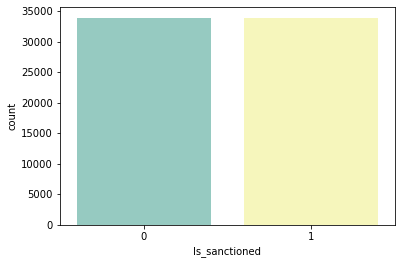

In [68]:
#Distribution of split data

ax = sns.countplot(x = y_train, palette = 'Set3')

# Logistic Regression with Parameters having most importance as identified

In [69]:
#Model training

logreg = LogisticRegression(random_state=10,C=0.001274)

logreg.fit(X_train,y_train)

LogisticRegression(C=0.001274, random_state=10)

In [70]:
#predict "Is_sanctioned"
y_pred = logreg.predict(X_train)

#probabilities of prediction
pred_proba = logreg.predict_proba(X_train)

#coefficients of parameters
logreg.coef_


array([[-5.70196655e-06,  2.87014647e-04, -2.08282696e-01,
         2.87014647e-04, -4.40264655e-05,  1.02480368e-03,
        -3.15343048e-01, -1.36761287e-05,  1.83409177e-05,
        -3.38589630e-02, -1.97397932e-01, -6.81210845e-02,
         6.18921341e-02, -8.04568133e-02,  5.69820695e-02,
        -3.08787696e-04, -1.39129170e-02, -8.63615868e-04,
        -6.74650846e-03,  2.09502537e-01,  2.94038738e-02,
         1.98617773e-01]])

In [71]:
# Model Evaluation

#Accuracy on train data
print("Accuracy on training data is ",logreg.score(X_train,y_train))

#Accuracy on test data
print("Accuracy on test data is ",logreg.score(X_test,y_test))

print('\n')

#classification report
print(classification_report(y_train,y_pred))

Accuracy on training data is  0.6784200812107789
Accuracy on test data is  0.6759480326191436


              precision    recall  f1-score   support

           0       0.67      0.70      0.69     33910
           1       0.69      0.66      0.67     33815

    accuracy                           0.68     67725
   macro avg       0.68      0.68      0.68     67725
weighted avg       0.68      0.68      0.68     67725



In [72]:
#Confusion matrix function

def plot_confusion_matrix(cm, classes=None, title = 'Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

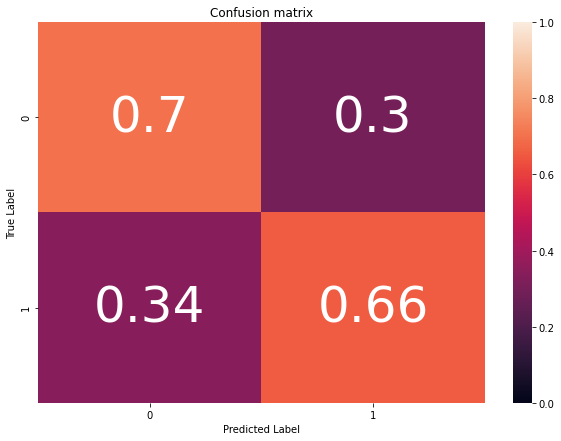

In [73]:
#Visualizing confusion matrix

cm = confusion_matrix(y_train,y_pred)
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)

plt.figure(figsize=(10,7))
plot_confusion_matrix(cm_norm, classes = logreg.classes_, title = 'Confusion matrix')

In [74]:
#Actual confusion matrix and Percentage of actual and predicted 0s and 1s

print(cm)
print('\n')
print(cm_norm)

[[23745 10165]
 [11614 22201]]


[[0.70023592 0.29976408]
 [0.34345705 0.65654295]]


In [75]:
#Confusion matrix metrics 

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)

#True positive rate (sensitivity)
TPR = TP / (TP + FN)
print('The true positive rate is',TPR)

#Positive predictive value
PPV = TP / (TP + FP)
print('The precision is',PPV)

#False alarm
FPR = FP / (FP + TN)
print('The false positive rate is',FPR)

#Miss rate
FNR = FN / (FN + TP)
print('The False Negative rate is',FNR)

#Total averages:
print('\n')
print('The average true positive rate is',TPR.sum()/2)
print('The average precision is',PPV.sum()/2)
print('The average false positive rate is',FPR.sum()/2)
print('The average False Negative rate is',FNR.sum()/2)

The true positive rate is [0.70023592 0.65654295]
The precision is [0.67154048 0.68593586]
The false positive rate is [0.34345705 0.29976408]
The False Negative rate is [0.29976408 0.34345705]


The average true positive rate is 0.6783894364591487
The average precision is 0.6787381716796415
The average false positive rate is 0.3216105635408512
The average False Negative rate is 0.3216105635408512


In [76]:
#Checking log_loss on training data
#print('Log loss in training is: ',log_loss(y_train,pred_proba))

#Checking log_loss on test data
#pred_proba_test = logreg.predict_proba(X_test)
#print('Log loss in testing is: ',log_loss(y_test,pred_proba_test))

# SInce we didn't get better results, we apply C parameter Tuning

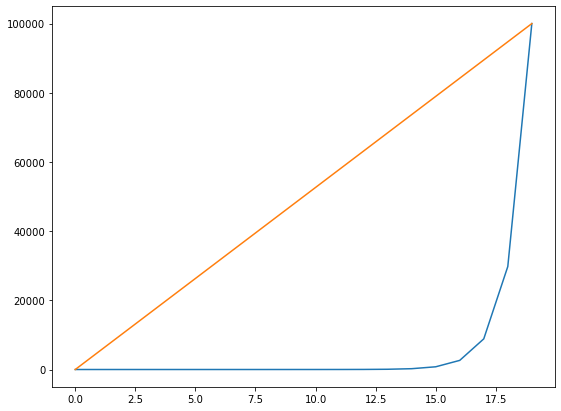

In [77]:
#Range of c values
np.geomspace(1e-5,1e5,num=20)

#plotting the values
plt.figure(figsize=(9,7))
plt.plot(np.geomspace(1e-5,1e5,num=20))
plt.plot(np.linspace(1e-5,1e5,num=20))

In [78]:
#looping the parameters
C_List = np.geomspace(1e-5,1e5,num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    logreg2 = LogisticRegression(random_state=10,C=c)
    logreg2.fit(X_train,y_train)
    score = logreg2.score(X_test,y_test)
    CA.append(score)
    print('Classification accuracy of C parameter {} is {}'.format(c,score))
    #pred_proba_t = logreg2.predict_proba(X_test)
    #log_loss2 = log_loss(y_test,pred_proba_t)
    #Logarithmic_Loss.append(log_loss2)
    #print('Log loss of C parameter {} is {}'.format(c,log_loss2))
    print('')

Classification accuracy of C parameter 1e-05 is 0.6533750891445227

Classification accuracy of C parameter 3.359818286283781e-05 is 0.6592043657561006

Classification accuracy of C parameter 0.00011288378916846884 is 0.6575610058602834

Classification accuracy of C parameter 0.000379269019073225 is 0.6790797184583424

Classification accuracy of C parameter 0.0012742749857031334 is 0.6464915816563828

Classification accuracy of C parameter 0.004281332398719391 is 0.6796998542680847

Classification accuracy of C parameter 0.01438449888287663 is 0.6749868221140429

Classification accuracy of C parameter 0.04832930238571752 is 0.6747387677901461

Classification accuracy of C parameter 0.1623776739188721 is 0.6746767542091718

Classification accuracy of C parameter 0.5455594781168515 is 0.6747077609996589

Classification accuracy of C parameter 1.8329807108324339 is 0.6735295029611484

Classification accuracy of C parameter 6.1584821106602545 is 0.6746767542091718

Classification accuracy o

In [79]:
#Reshaping CA
CA2 = np.array(CA).reshape(20,)

#combining the outcomes
output = zip(C_List,CA2)

#convert to dataframe
df_output = pd.DataFrame(output,columns = ['C_List','Classification_Accuracy'])
df_output.sort_values('Classification_Accuracy',ascending = False).reset_index()

,index,C_List,Classification_Accuracy
0,5,0.004281,0.679700
1,3,0.000379,0.679080
2,13,69.519280,0.675638
3,6,0.014384,0.674987
4,19,100000.000000,0.674739
5,7,0.048329,0.674739
6,14,233.572147,0.674739
7,18,29763.514416,0.674708
8,9,0.545559,0.674708
9,16,2636.650899,0.674708


In [80]:
#Comparing with dummy classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train,y_train)
score = dummy_clf.score(X_test,y_test)

print("Testing accuracy",score)

Testing accuracy 0.4954885119841245


In [81]:
#Training with final model on 10% validation data

logreg3 = LogisticRegression(random_state=10,C=0.001274)
logreg3.fit(X_train,y_train)
score = logreg3.score(X_valid,y_valid)

print("Testing accuracy",score)

Testing accuracy 0.6795110284347595


# Logistic Regression with Wrapper method parameters

In [82]:
#Logistic Regression with wrapper method parameters

X1 = asbank1[['Income ', 'Req_Amount', 'Tenure', 'Curr_EMI', 'Cust_age', 'Lead_age', 'Gender_Female', 'Gender_Male',
     'Id_City_A', 'Id_City_B', 'Loc_id ']]
X1

y1 = asbank1['Is_sanctioned']
y1 = y.astype(int)

print(X.shape)
print(y.shape)

(55058, 22)
(55058,)


In [83]:
#over-sampling to remove the highly imbalanced scenario

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 10)
X_res1,y_res1 = smk.fit_sample(X1,y1)

In [84]:
#shape of oversampled data

X_res1.shape, y_res1.shape

((107370, 11), (107370,))

In [85]:
#Number of resampled observations

from collections import Counter
print('Original dataset shape {}',format(Counter(y)))
print('Resampled dataset shape {}',format(Counter(y_res)))

Original dataset shape {} Counter({0: 54250, 1: 808})
Resampled dataset shape {} Counter({0: 53751, 1: 53751})


In [86]:
#Splitting data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1, train_size = 0.7, test_size = 0.3, random_state=0)

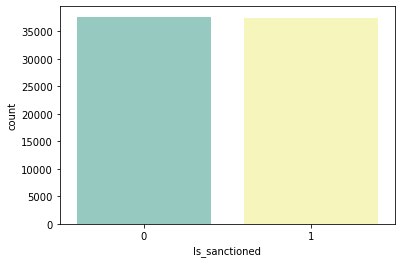

In [87]:
#Distribution of split data

ax = sns.countplot(x = y_train1, palette = 'Set3')

In [88]:
#Model training

logreg4 = LogisticRegression(random_state=10)

logreg4.fit(X_train1,y_train1)

LogisticRegression(random_state=10)

In [89]:
#predict "Is_sanctioned"
y_pred1 = logreg4.predict(X_test1)

#probabilities of prediction
pred_proba = logreg4.predict_proba(X_test1)

#coefficients of parameters and intercept
print(logreg4.coef_, logreg.intercept_)

[[-1.02842596e-07  9.50432185e-06 -2.86481860e-06  1.74238226e-04
  -9.38724734e-07 -3.90695192e-06 -2.34620293e-06  8.71257617e-07
  -5.88416306e-07 -7.95927485e-07 -6.15803306e-05]] [0.00122035]


In [90]:
# Model Evaluation

from sklearn.metrics import accuracy_score
from sklearn import metrics
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))

print('\n')

#classification report
print(classification_report(y_test1,y_pred1))



Accuracy: 0.6099779578404892
Precision: 0.6864887148304648
Recall: 0.41163020640217524


              precision    recall  f1-score   support

           0       0.58      0.81      0.67     16029
           1       0.69      0.41      0.51     16182

    accuracy                           0.61     32211
   macro avg       0.63      0.61      0.59     32211
weighted avg       0.63      0.61      0.59     32211



In [91]:
#Finding area under the curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",logreg4.score(X_train1,y_train1))
print("test Accuracy : ",logreg4.score(X_test1,y_test1))

Area Under ROC Curve: 0.6109245922521825
train Accuracy :  0.608084194840272
test Accuracy :  0.6099779578404892


In [92]:
#Confusion matrix function

def plot_confusion_matrix(cm, classes=None, title = 'Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

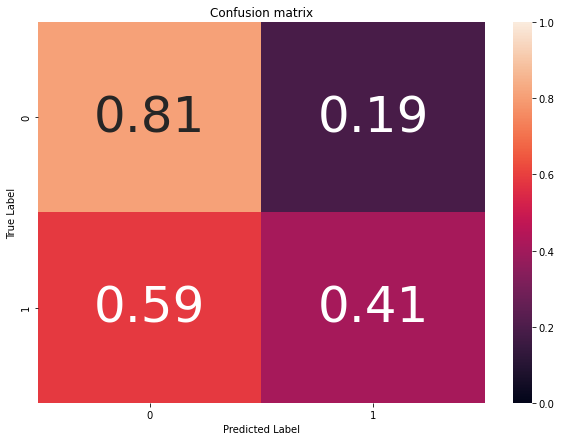

In [93]:
#Visualizing confusion matrix for logistic regression

cm = confusion_matrix(y_test1,y_pred1)
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)

plt.figure(figsize=(10,7))
plot_confusion_matrix(cm_norm, classes = logreg4.classes_, title = 'Confusion matrix')

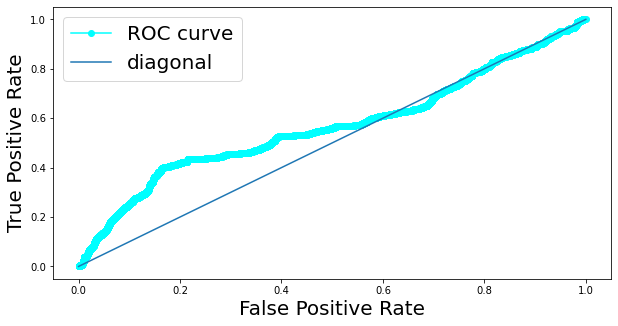

In [94]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test1), np.array(pred_proba[:,1]), pos_label=1) 

metrics.auc(fpr, tpr)

pd.DataFrame({'thresholds':thresholds,'tpr':tpr,'fpr':fpr})

plt.subplots(figsize=(10, 5))
plt.plot(fpr, tpr, 'o-', label="ROC curve",color='cyan')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")

    
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate",fontsize=20)
plt.ylabel("True Positive Rate",fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(fontsize=20)
plt.show()

# KNN Classification

In [95]:
#Implementing KNN Classifier model on the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors = 5) 
neigh.fit(X_train1,y_train1)


y_predicted1 = neigh.predict(X_test1)


from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') 
print(confusion_matrix(y_test1, y_predicted1))

from sklearn.metrics import accuracy_score
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_predicted1))
print("Precision:",metrics.precision_score(y_test1, y_predicted1))
print("Recall:",metrics.recall_score(y_test1, y_predicted1))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test1, y_predicted1))


confustion matrix
[[14332  1697]
 [  635 15547]]


Accuracy: 0.9276023718605445
Precision: 0.9015889584783113
Recall: 0.960758867877889

classification report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     16029
           1       0.90      0.96      0.93     16182

    accuracy                           0.93     32211
   macro avg       0.93      0.93      0.93     32211
weighted avg       0.93      0.93      0.93     32211



In [96]:
#Finding area under the curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_predicted1, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",neigh.score(X_train1,y_train1))
print("test Accuracy : ",neigh.score(X_test1,y_test1))

Area Under ROC Curve: 0.9274441291788222
train Accuracy :  0.9523676472544872
test Accuracy :  0.9276023718605445


# KNN Classifier model gives an accuracy of 92.8% on test data and 95.3% on training data.

In [97]:
#Confusion matrix function

def plot_confusion_matrix(cm, classes=None, title = 'Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

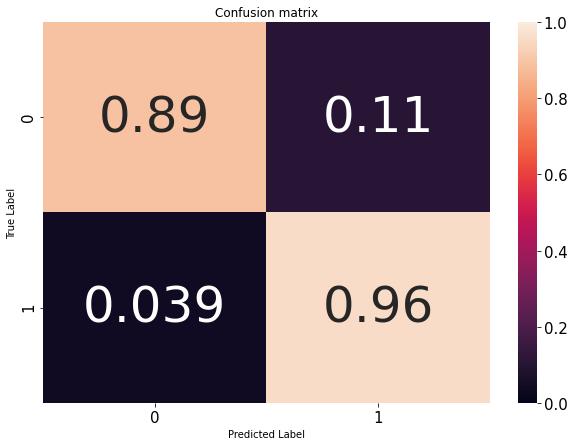

In [98]:
#Visualizing confusion matrix for KNN

cm = confusion_matrix(y_test1,y_predicted1)
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)

plt.figure(figsize=(10,7))
plot_confusion_matrix(cm_norm, classes = neigh.classes_, title = 'Confusion matrix')

In [99]:
#probabilities of KNN prediction
KNN_pred_proba = neigh.predict_proba(X_test1)

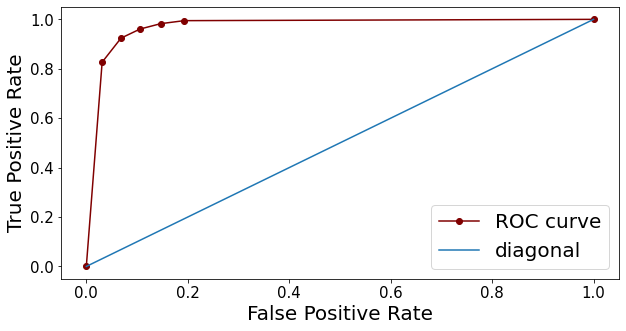

In [100]:
#Area under ROC curve for KNN classification

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test1), np.array(KNN_pred_proba[:,1]), pos_label=1)  

metrics.auc(fpr, tpr)

pd.DataFrame({'thresholds':thresholds,'tpr':tpr,'fpr':fpr})

plt.subplots(figsize=(10, 5))
plt.plot(fpr, tpr, 'o-', label="ROC curve",color='maroon')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")

    
plt.legend(loc="upper left")
plt.xlabel("False Positive Rate",fontsize=20)
plt.ylabel("True Positive Rate",fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(fontsize=20)
plt.show()

In [101]:
#X_train1.to_csv('KNN_train_data.csv')

In [102]:
#X_test1.to_csv('KNN_test_data.csv')

In [103]:
#y_predicted1 = pd.DataFrame(y_predicted1)
#y_predicted1.to_csv('KNN_predicted_values.csv')

In [104]:
#asbank.to_csv('asbanK_dataset.csv')

# Since model is ready, we apply our model on Testing Data set

In [105]:
#reading the test file and storing in test

test = pd.read_csv('D:/Kartik/VESIM Docs/MBA Competitions/Brain-A-lytics/test.csv')

In [106]:
#checking null values

test.isnull().sum()

S_No                    0
Cust_id                 0
Gender                  0
Cust_dob                0
Lead_Created_On         0
Loc_id                161
Id_City               161
Employer_Id           811
Employer_Ct1          811
Employer_Ct2          858
Income                  0
CustBankCode         1871
Type_Bank            1871
IsContacted             0
Lead_Origin             0
Origin_Category         0
Prev_EMI               12
Req_Amount           5448
Tenure               5448
Rate                 9369
Curr_EMI             9369
Is_sanctioned       13765
dtype: int64

In [107]:
#columns in the dataset

test.columns

Index(['S_No', 'Cust_id ', 'Gender', 'Cust_dob ', 'Lead_Created_On ',
       'Loc_id ', 'Id_City', 'Employer_Id', 'Employer_Ct1 ', 'Employer_Ct2',
       'Income ', 'CustBankCode ', 'Type_Bank', 'IsContacted', 'Lead_Origin ',
       'Origin_Category', 'Prev_EMI ', 'Req_Amount', 'Tenure', 'Rate',
       'Curr_EMI', 'Is_sanctioned'],
      dtype='object')

In [108]:
#converting cust dob to cust age and same for lead created to lead_age
#since we have already created function for this task, we will just apply the function

#Converting string format to datetime format

test['Cust_dob '] = pd.to_datetime(test['Cust_dob '])
test['Lead_Created_On '] = pd.to_datetime(test['Lead_Created_On '])

test['Cust_age'] = test['Cust_dob '].apply(calculate_age)
test['Lead_age'] = test['Lead_Created_On '].apply(calculate_age)

#Converting it into Data Frame

Cust_age = pd.DataFrame(test['Cust_age'])
Lead_age = pd.DataFrame(test['Lead_age'])

In [109]:
#Dropping the dates column

test = test.drop(['Cust_dob ', 'Lead_Created_On '],axis=1)

In [110]:
test

,S_No,Cust_id,Gender,Loc_id,Id_City,Employer_Id,Employer_Ct1,Employer_Ct2,Income,CustBankCode,...,Lead_Origin,Origin_Category,Prev_EMI,Req_Amount,Tenure,Rate,Curr_EMI,Is_sanctioned,Cust_age,Lead_age
0,2,20642965890,Male,10024.0,A,COM0023595,A,4.0,2500.0,B014,...,S133,F,0.0,36000.0,5.0,19.00,934.0,NaN,32,3
1,3,30450965663,Female,10004.0,A,COM0000203,A,4.0,800.0,B022,...,S133,F,0.0,NaN,NaN,NaN,NaN,NaN,33,10
2,22,",'",Male,10001.0,A,COM0000448,A,4.0,2050.0,B043,...,S133,C,0.0,24000.0,3.0,16.75,853.0,NaN,43,4
3,32,40581766200,Female,10005.0,A,COM0000085,A,3.0,1600.0,B001,...,S133,F,0.0,37000.0,5.0,18.50,950.0,NaN,46,10
4,45,50559286146,Male,10001.0,A,COM0023213,B,4.0,1800.0,B001,...,S143,F,0.0,40000.0,5.0,NaN,NaN,NaN,38,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13760,68800,80006309010,Female,10001.0,A,COM0002513,A,4.0,1650.0,B001,...,S122,G,0.0,NaN,NaN,NaN,NaN,NaN,35,6
13761,68804,80255791896,Female,10023.0,B,COM0019219,A,4.0,2000.0,B008,...,S122,G,0.0,NaN,NaN,NaN,NaN,NaN,64,5
13762,68806,30759934811,Male,10004.0,A,COM0052805,A,4.0,2400.0,NaN,...,S122,G,0.0,10000.0,2.0,28.50,551.0,NaN,45,6
13763,68807,50268774469,Male,10004.0,A,COM0047935,C,4.0,1600.0,B001,...,S122,G,0.0,26000.0,4.0,31.50,959.0,NaN,54,9


In [111]:
#Dropping non relevant columns

test = test.drop(['S_No', 'Cust_id ','Employer_Id','Employer_Ct1 ', 'Employer_Ct2'],axis=1)

In [112]:
test.columns

Index(['Gender', 'Loc_id ', 'Id_City', 'Income ', 'CustBankCode ', 'Type_Bank',
       'IsContacted', 'Lead_Origin ', 'Origin_Category', 'Prev_EMI ',
       'Req_Amount', 'Tenure', 'Rate', 'Curr_EMI', 'Is_sanctioned', 'Cust_age',
       'Lead_age'],
      dtype='object')

In [113]:
#filling in the null values of city with mode 

x = test['Id_City'].mode()
test['Id_City'].fillna(x[0],inplace=True)

In [114]:
#Grouping people into age groups

bins = [30,40,50,60,70,80]
labels = ['Young_adults','Adult','Middle_Age','Retired','Senior_Citizen']

test['Age_group'] = pd.cut(test['Cust_age'],bins = bins, labels = labels)
pd.DataFrame(test['Age_group'].value_counts())

,Age_group
Retired,3432
Young_adults,3398
Adult,3373
Middle_Age,3227
Senior_Citizen,31


In [115]:
#filling the null values of Age_group with mode I.e.'Retired' value

test['Age_group'] = test['Age_group'].fillna('Retired')

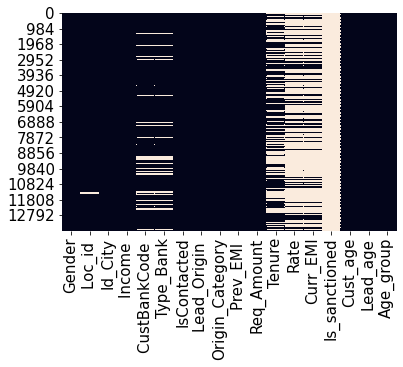

In [116]:
#adding missing values to req_amount with mean value of respective age groups

def impute_missing_req_amt(columns):
    req_amt=columns[0]
    age_group = columns[1]
    if pd.isnull(req_amt):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['Req_Amount'].mean()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['Req_Amount'].mean()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['Req_Amount'].mean()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['Req_Amount'].mean()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['Req_Amount'].mean()
        
    else:
        return req_amt

test['Req_Amount'] = test[['Req_Amount','Age_group']].apply(impute_missing_req_amt,axis=1)
sns.heatmap(test.isnull(),cbar=False)

In [117]:
#In all Age groups, Type of Bank preferrred most is P(Private)

test.groupby(['Age_group', 'Type_Bank'])['Type_Bank'].count()

Age_group       Type_Bank
Young_adults    G            1042
                P            1902
Adult           G             967
                P            1972
Middle_Age      G             995
                P            1798
Retired         G            1079
                P            2111
Senior_Citizen  G               8
                P              20
Name: Type_Bank, dtype: int64

In [118]:
#filling null values of Type_Bank with P

test['Type_Bank'] = test['Type_Bank'].fillna('P')

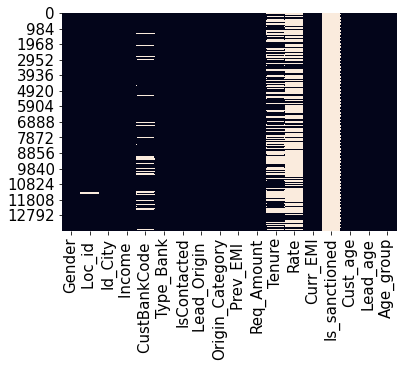

In [119]:
#adding missing values to Curr_EMI using mean of Curr_EMI of age group

def impute_missing_Curr_EMI(columns):
    Curr_EMI=columns[0]
    age_group = columns[1]
    if pd.isnull(Curr_EMI):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['Curr_EMI'].mean()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['Curr_EMI'].mean()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['Curr_EMI'].mean()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['Curr_EMI'].mean()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['Curr_EMI'].mean()
        
    else:
        return Curr_EMI

test['Curr_EMI'] = test[['Curr_EMI','Age_group']].apply(impute_missing_Curr_EMI,axis=1)
sns.heatmap(test.isnull(),cbar=False)

In [120]:
#calculating mode of tenure 

print(test[test['Age_group']=='Young_adults']['Tenure'].mode())
print(test[test['Age_group']=='Adult']['Tenure'].mode())
print(test[test['Age_group']=='Senior_Citizen']['Tenure'].mode())
print(test[test['Age_group']=='Middle_Age']['Tenure'].mode())
print(test[test['Age_group']=='Retired']['Tenure'].mode())

0    5.0
dtype: float64
0    5.0
dtype: float64
0    4.0
dtype: float64
0    5.0
dtype: float64
0    5.0
dtype: float64


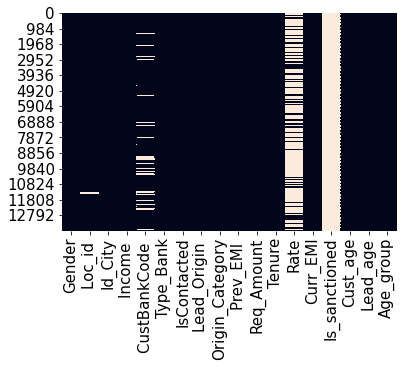

In [121]:
#adding missing values to Tenure using mode of Tenure of age group

test['Tenure'] = test['Tenure'].fillna(5)
sns.heatmap(test.isnull(),cbar=False)

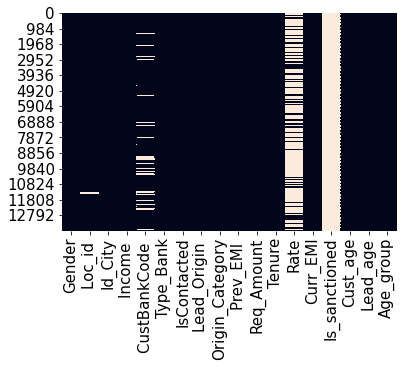

In [122]:
#adding missing values to Prev_EMI using mean of Prev_EMI of age group

def impute_missing_Prev_EMI(columns):
    Prev_EMI=columns[0]
    age_group = columns[1]
    if pd.isnull(Prev_EMI):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['Prev_EMI '].mean()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['Prev_EMI '].mean()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['Prev_EMI '].mean()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['Prev_EMI '].mean()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['Prev_EMI '].mean()
        
    else:
        return Prev_EMI

test['Prev_EMI '] = test[['Prev_EMI ','Age_group']].apply(impute_missing_Prev_EMI,axis=1)
sns.heatmap(test.isnull(),cbar=False)

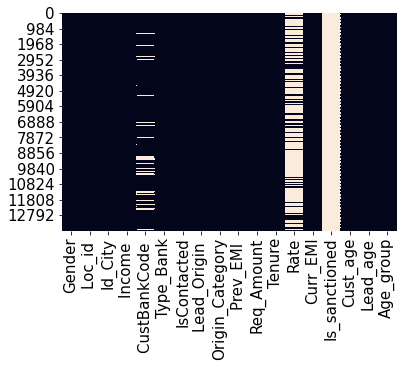

In [123]:
#adding missing values to Loc_id using mode

def impute_missing_Loc_id(columns):
    Loc_id=columns[0]
    age_group = columns[1]
    if pd.isnull(Loc_id):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['Loc_id '].mode()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['Loc_id '].mode()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['Loc_id '].mode()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['Loc_id '].mode()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['Loc_id '].mode()
        
    else:
        return Loc_id

test['Loc_id '] = test[['Loc_id ','Age_group']].apply(impute_missing_Loc_id,axis=1)
sns.heatmap(test.isnull(),cbar=False)

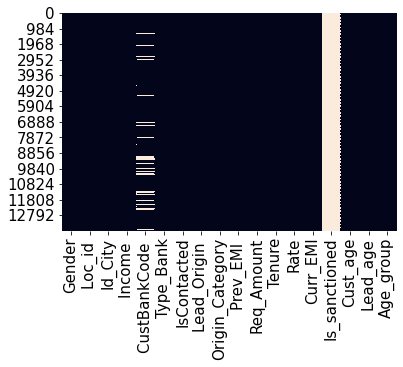

In [124]:
#adding missing values to Rate using mean of Rate of age group

def impute_missing_Rate(columns):
    Rate=columns[0]
    age_group = columns[1]
    if pd.isnull(Rate):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['Rate'].mean()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['Rate'].mean()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['Rate'].mean()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['Rate'].mean()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['Rate'].mean()
        
    else:
        return Rate

test['Rate'] = test[['Prev_EMI ','Age_group']].apply(impute_missing_Rate,axis=1)
sns.heatmap(test.isnull(),cbar=False)

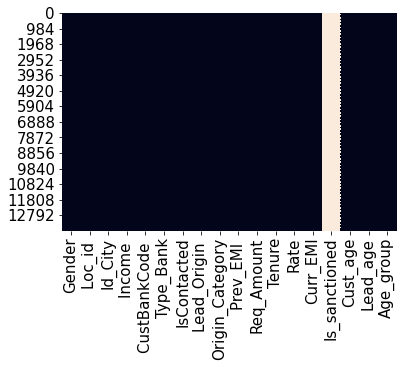

In [125]:
#adding missing values to CustBankCode using mode of CustBankCode of age group

def impute_missing_CustBankCode(columns):
    CustBankCode=columns[0]
    age_group = columns[1]
    if pd.isnull(CustBankCode):
        if(age_group=='Young_adults'):
            return test[test['Age_group']=='Young_adults']['CustBankCode '].mode()
        elif(age_group=='Adult'):
            return test[test['Age_group']=='Adult']['CustBankCode '].mode()
        elif(age_group=='Middle_Age'):
            return test[test['Age_group']=='Middle_Age']['CustBankCode '].mode()
        elif(age_group=='Retired'):
            return test[test['Age_group']=='Retired']['CustBankCode '].mode()
        elif(age_group=='Senior_Citizen'):
            return test[test['Age_group']=='Senior_Citizen']['CustBankCode '].mode()
        
    else:
        return CustBankCode

test['CustBankCode '] = test[['CustBankCode ','Age_group']].apply(impute_missing_CustBankCode,axis=1)
sns.heatmap(test.isnull(),cbar=False)

In [126]:
test.isnull().sum()

Gender                 0
Loc_id                 0
Id_City                0
Income                 0
CustBankCode           0
Type_Bank              0
IsContacted            0
Lead_Origin            0
Origin_Category        0
Prev_EMI               0
Req_Amount             0
Tenure                 0
Rate                   0
Curr_EMI               0
Is_sanctioned      13765
Cust_age               0
Lead_age               0
Age_group              0
dtype: int64

In [127]:
#Cnverting categorical data to binary data

features = [ 'Gender', 'Id_City',  'Type_Bank', 'IsContacted',  'Origin_Category']
test1 = test
test1 = pd.get_dummies(test,columns=features)

In [128]:
test1.isnull().sum()

Loc_id                   0
Income                   0
CustBankCode             0
Lead_Origin              0
Prev_EMI                 0
Req_Amount               0
Tenure                   0
Rate                     0
Curr_EMI                 0
Is_sanctioned        13765
Cust_age                 0
Lead_age                 0
Age_group                0
Gender_Female            0
Gender_Male              0
Id_City_A                0
Id_City_B                0
Id_City_C                0
Type_Bank_G              0
Type_Bank_P              0
IsContacted_N            0
IsContacted_Y            0
Origin_Category_B        0
Origin_Category_C        0
Origin_Category_D        0
Origin_Category_E        0
Origin_Category_F        0
Origin_Category_G        0
dtype: int64

In [129]:
#KNN Classification with wrapper method parameters

X5 = test1[['Income ', 'Req_Amount', 'Tenure', 'Curr_EMI', 'Cust_age', 'Lead_age', 'Gender_Female', 'Gender_Male',
     'Id_City_A', 'Id_City_B', 'Loc_id ']]
X5

y5 = test1['Is_sanctioned']


print(X5.shape)
print(y5.shape)

(13765, 11)
(13765,)


In [130]:
#Prediction on test data set based on wrapper parameters

y_predicted5 = neigh.predict(X5)

In [131]:
y_predicted5.shape

(13765,)

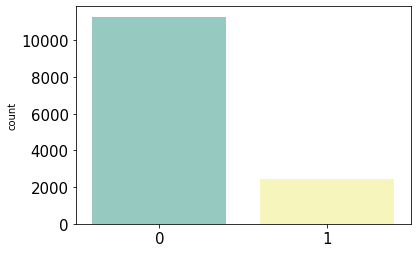

In [132]:
#Distribution of predicted data

ax = sns.countplot(x = y_predicted5, palette = 'Set3')

In [133]:
#Storing y_predicted5 values in Test Data

test['Is_sanctioned'] = y_predicted5

In [134]:
#count of predicted sanctioned and not-sanctioned loans

test['Is_sanctioned'].value_counts()

0    11297
1     2468
Name: Is_sanctioned, dtype: int64

In [142]:
#test.to_csv('Imputed_test_data_with_final_values.csv')

In [137]:
#Add the predicted values to original test file

#submission = pd.read_csv('D:/Kartik/VESIM Docs/MBA Competitions/Brain-A-lytics/test.csv')

In [138]:
#submission['Is_sanctioned'] = y_predicted5

In [140]:
#submission

In [ ]:
#Convert submission file to csv and name it in the asked format

#submission.to_csv('test.csv')

In [ ]:
#KNN_pred_proba = pd.DataFrame(KNN_pred_proba)
#KNN_pred_proba
#KNN_pred_proba.to_csv('Probabilities_of_KNN_Classifier.csv')

In [ ]:
#pred_proba = pd.DataFrame(pred_proba)
#pred_proba
#pred_proba.to_csv('Probabilities_of_Logistic_Regression.csv')

# Thank You